# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

# Introducción y planteamiento del problema

Megaline es una empresa de telecomunicaciones, la cual brinda dos opciones de planes tarifarios a sus clientes: 

El plan Surf otorga al cliente 500 minutos, 50 mensajes SMS y 15Gb de datos por un precio de 20 dólares mensuales. Sin embargo, en caso de exceder los límites del plan, la empresa cobra una penalización de 3 centavos el minuto de llamada, 3 centavos el mensaje SMS y 10 dólares el Gb consumido.

El plan Ultimate brinda al cliente 3,000 minutos, 1,000 mensajes SMS y 30Gb de datos pagando 70 dolares al mes. En caso de sobrepasar los beneficios del plan, el cliente deberá pagar 1 centavo por cada minuto de llamada, 1 centavo por mensaje SMS y 7 dólares el Gb consumido.

Es importante recalcar que la empresa redondea los segundos a minutos y los megabytes a gigabytes. Es decir, si una llamada dura menos de 1 minuto, esta será contabilizada con duración de un minuto, al igual que con la navegación web con megabytes.

Megaline desea conocer cual de los dos planes brinda mayores utilidades a la empresa, con el objetivo de realizar ajustes a la publicidad de ambos planes para maximizar beneficios. Para el análisis, se cuenta con una base de datos del 2018 de 500 clientes de la empresa. 

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv("/datasets/megaline_users.csv")
calls = pd.read_csv("/datasets/megaline_calls.csv")
messages = pd.read_csv("/datasets/megaline_messages.csv")
internet = pd.read_csv("/datasets/megaline_internet.csv")
plans = pd.read_csv("/datasets/megaline_plans.csv")

# Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

### Visualización de la tabla

In [3]:
# Imprime una muestra de los datos para las tarifas
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Información general de la tabla 

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

No se observa que haya problemas en la base de datos de los planes tarifarios. Es una base de datos simple, en la cual se muestra la información pertinente de cada plan tarifario.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

La tabla solo muestra cuantos megabytes incluye el plan, por lo que se optó por incluir una columna donde se indicaran tambien los gigabytes incluidos, ya que es una medida más utilizada para promocionar los planes a los clientes.

In [5]:
gb = 1024
plans["gb_per_month_included"] = plans["mb_per_month_included"]/gb
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [6]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes


## Usuarios/as

### Información general de la tabla

In [7]:
# Imprime una muestra de datos para usuarios
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se observan datos ausentes en la columna "churn_name", sin embargo esto significa que el usuario no ha cancelado el plan. Por otro lado, la columna "reg_date" no esta en el formato correcto.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

#### Columna "reg_date"

Los datos de la columna deben de ser del tipo datetime, no object.

In [9]:
users["reg_date"] = pd.to_datetime(users["reg_date"], format = "%Y-%m-%d")
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


#### Columna "churn_date"

Se van a sustituir los valores ausentes de la columna por un valor para indicar que el usuario actualente sigue con el mismo plan tarifario. El valor a sustituir será la fecha del día de realización de este proyecto: "2024-10-30".

In [11]:
print(users["churn_date"].isna().sum())
print()
print("Se puede observar que " + str(users["churn_date"].isna().sum()) + " son valores austentes, lo que significa que el " + str((((users["churn_date"].isna().sum())/500))*100) + "% de los usuarios aun mantienen su plan tarifario.")

466

Se puede observar que 466 son valores austentes, lo que significa que el 93.2% de los usuarios aun mantienen su plan tarifario.


In [12]:
users["churn_date"] = users["churn_date"].fillna("2024-10-30")
users["churn_date"].head(10)

0    2024-10-30
1    2024-10-30
2    2024-10-30
3    2024-10-30
4    2024-10-30
5    2024-10-30
6    2018-12-18
7    2024-10-30
8    2024-10-30
9    2024-10-30
Name: churn_date, dtype: object

Como se observa que esta columna tambien indica una fecha, se cambiará el tipo de datos de object a datetime.

In [13]:
users["churn_date"] = pd.to_datetime(users["churn_date"], format = "%Y-%m-%d")
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2024-10-30
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2024-10-30
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2024-10-30
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2024-10-30
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2024-10-30
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2024-10-30
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2024-10-30
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2024-10-30
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2024-10-30


#### Columna "plan" 

Se transformarán el tipo de datos de la columna de objeto a categóricos, ya que o el usuario cuenta con el plan Surf o el plan Ultimate.

In [14]:
users["plan"] = users["plan"].astype("category")
print(users["plan"].value_counts())

surf        339
ultimate    161
Name: plan, dtype: int64


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  500 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 28.1+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

No parece haber ningún tipo de información adicional que pueda agregarse a la base de datos para enriquecerla.

## Llamadas

### Información general de la tabla

In [16]:
# Imprime una muestra de datos para las llamadas
calls.head(10)



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [17]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No parece haber presencia de valores ausentes en la base de datos. Sin embargo, se observa una columna con la fecha de la llamada que no cuenta con el tipo de datos correcto. Asimismo, la columna "duration" indica el tiempo de la llamada en minutos y segundos, por lo que para fines prácticos, se creará una columna con la duración de la llamada en minutos, redondeando hacia el número superior el minuto de llamada.

### Corregir los datos

#### Columna "call_date" 

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [18]:
calls["call_date"] = pd.to_datetime(calls["call_date"], format = "%Y-%m-%d")
calls["call_date"]

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]

#### Columna "duration"

Se creará una columna con el nombre "duration_round" para almacenar los valores de las llamadas redondeadas al minuto superior.

In [19]:
calls["duration_round"] = calls["duration"].apply(np.ceil)
calls

,id,user_id,call_date,duration,duration_round
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9.0
137731,1499_200,1499,2018-10-20,10.89,11.0
137732,1499_201,1499,2018-09-21,8.12,9.0
137733,1499_202,1499,2018-10-10,0.37,1.0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Se agregará una columna donde se indique el mes en el que fue realizada la llamada, para poder realizar más adelante los cálculos de cuantos minutos de llamadas realizó cada usuario por mes. Además, esta columna sera del tipo categórica, ya que dividirá por mes a las llamadas de los usuarios.

In [20]:
calls["month"] = calls["call_date"].dt.month
calls["month"] = calls["month"].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12], value = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
print(calls["month"].value_counts())

Diciembre     30614
Noviembre     24651
Octubre       21064
Septiembre    16523
Agosto        13590
Julio         11105
Junio          8221
Mayo           5959
Abril          3442
Marzo          1620
Febrero         774
Enero           172
Name: month, dtype: int64


Tambien se agregará una columna donde se indique el tipo de plan tarifario de cada usuario. 

In [21]:
tarifa_por_usuario = users[["user_id","plan"]]
calls = calls.merge(tarifa_por_usuario, on = "user_id", how = "left")

In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              137735 non-null  object        
 1   user_id         137735 non-null  int64         
 2   call_date       137735 non-null  datetime64[ns]
 3   duration        137735 non-null  float64       
 4   duration_round  137735 non-null  float64       
 5   month           137735 non-null  object        
 6   plan            137735 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 7.5+ MB


## Mensajes

### Información general de la tabla 

In [23]:
# Imprime una muestra de datos para los mensajes
messages.head(10)



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [24]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No parece haber presencia de valores nulos. La columna "message_date" contiene un tipo de datos que no es correcto, por lo que hay que transformarla. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

#### Columna "message_date"

Las fechas estan en un tipo de datos incorrectos. Se deben convertir al tipo datetime.

In [25]:
messages["message_date"] = pd.to_datetime(messages["message_date"], format = "%Y-%m-%d")
messages[["message_date"]]

,message_date
0,2018-12-27
1,2018-12-31
2,2018-12-31
3,2018-12-27
4,2018-12-26
...,...
76046,2018-12-24
76047,2018-12-24
76048,2018-12-31
76049,2018-12-24


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Se agregará una columna donde se indique el mes en el que se envió el mensaje, para poder realizar más adelante los cálculos del numero de mensajes enviados por usuario en cada mes. esta columna será del tipo categórica.

In [26]:
messages["month"] = messages["message_date"].dt.month
messages["month"] = messages["month"].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12], value = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
print(messages["month"].value_counts())

Diciembre     19071
Noviembre     14068
Octubre       12201
Septiembre     9227
Agosto         7394
Julio          5208
Junio          3833
Mayo           2780
Abril          1333
Marzo           594
Febrero         259
Enero            83
Name: month, dtype: int64


Tambien se creará una columna para indicar el tipo de plan de cada usuario.

In [27]:
messages = messages.merge(tarifa_por_usuario, on = "user_id", how = "left")

In [28]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  object        
 4   plan          76051 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 3.0+ MB


## Internet

### Información general de la tabla

In [29]:
# Imprime una muestra de datos para el tráfico de internet
internet.head(10)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [30]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Al igual que las bases de datos anteriores, no parece haber presencia de valores nulos o ausentes.

### Corregir los datos

#### Columna "session_date" 

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

Las fechas se encuentran en un tipo de dato erroneo, por lo que hay que transformarlas al tipo de dato datetime. 

In [31]:
internet["session_date"] = pd.to_datetime(internet["session_date"], format = "%Y-%m-%d")
internet["session_date"]

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

La base de datos solo posee información sobre la cantidad de megabytes consumidos, por lo que sería util agregra una columna donde se especifique la cantidad de gigabytes consumidos. Además, tambie se gregará una columna donde se indique el mes en el que se realizó la navegación en internet, la cual será del tipo categórica al igual que en las bases de datos anteriores.

#### Columna "gb_used"

Para crear la columna, se dividirá el número de megabytes entre el valor de un gigabyte, para osteriormente redondear hacia el número entero superior la cantidad de gigabytes calculados.

In [32]:
internet["gb_used"] = (internet["mb_used"]/gb).apply(np.ceil)
internet["gb_used"]

0         1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
104820    1.0
104821    1.0
104822    1.0
104823    0.0
104824    1.0
Name: gb_used, Length: 104825, dtype: float64

#### Columna "month"

In [33]:
internet["month"] = internet["session_date"].dt.month
internet["month"] = internet["month"].replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12], value = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"])
print(internet["month"].value_counts())

Diciembre     23492
Noviembre     18651
Octubre       16193
Septiembre    12722
Agosto        10718
Julio          8110
Junio          6057
Mayo           4288
Abril          2558
Marzo          1336
Febrero         604
Enero            96
Name: month, dtype: int64


Tambien se creará una columna indicando el tipo de plan tarifario de cada usuario.

In [34]:
internet = internet.merge(tarifa_por_usuario, on = "user_id", how = "left")

In [35]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   gb_used       104825 non-null  float64       
 5   month         104825 non-null  object        
 6   plan          104825 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 5.7+ MB


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [36]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


El plan tarifario Surf incluye lo siguiente:
- Pagando 20 dólares al mes:
    - 500 minutos en llamadas.
    - 50 mensajes SMS.
    - 15 Gb (15360 Mb) de navegación en internet.
- En caso de sobrepasar los límites, la compañia cobrará:
    - 3 centavos el minuto de llamada.
    - 3 centavos el mensaje SMS.
    - 10 dólares el Gb (1024 Mb) navegado.

El plan tarifario Ultimate incluye lo siguiente:
- Pagando 70 dólares al mes:
    - 1000 minutos en llamadas.
    - 3000 mensajes SMS.
    - 30 Gb (30720 Mb) de navegación en internet.
- En caso de sobrepasar los límites, la compañía cobrará:
    - 1 centavo el minuto de llamada.
    - 1 centavo el mensaje SMS.
    - 7 dólares el Gb (1024 Mb) navegado).
    
Es importante resaltar que la compañía no cobra por segundos y megabytes. Es decir, si un usuario realiza una llamada de 1 segundo, esta será contabilizada como de 1 minuto. El mismo caso aplica para los megabytes, si un usuario consume, por ejemplo, 500 megabytes de internet extra, se le cobrará como si hubiera consumido un gigabyte. 

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

A continuación, se creará una base de datos que contenga toda la información de los usuarios acerca de su comportamiento mensual con respecto a llamadas realizadas, minutos de dichas llamadas, mensajes SMS enviados y cantidad de internet consumido.

In [37]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas_por_usuario = calls.groupby(["user_id","month"])[["id"]].count()
llamadas_por_usuario

id
user_id month         
1000    Diciembre   16
1001    Agosto      27
        Diciembre   56
        Noviembre   64
        Octubre     65
...                 ..
1498    Septiembre  45
1499    Diciembre   65
        Noviembre   45
        Octubre     53
        Septiembre  41

[2258 rows x 1 columns]

In [38]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutos_por_usuario = calls.groupby(["user_id","month"])[["duration_round"]].sum()
minutos_por_usuario

duration_round
user_id month                     
1000    Diciembre            124.0
1001    Agosto               182.0
        Diciembre            412.0
        Noviembre            426.0
        Octubre              393.0
...                            ...
1498    Septiembre           363.0
1499    Diciembre            496.0
        Noviembre            308.0
        Octubre              385.0
        Septiembre           346.0

[2258 rows x 1 columns]

In [39]:
info_llamadas_por_usuario = pd.concat([llamadas_por_usuario,minutos_por_usuario], axis = "columns")
info_llamadas_por_usuario.rename(columns = {"id":"llamadas","duration_round":"minutos"}, inplace = True)
info_llamadas_por_usuario

llamadas  minutos
user_id month                        
1000    Diciembre         16    124.0
1001    Agosto            27    182.0
        Diciembre         56    412.0
        Noviembre         64    426.0
        Octubre           65    393.0
...                      ...      ...
1498    Septiembre        45    363.0
1499    Diciembre         65    496.0
        Noviembre         45    308.0
        Octubre           53    385.0
        Septiembre        41    346.0

[2258 rows x 2 columns]

In [40]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_por_usuario = messages.groupby(["user_id","month"])[["id"]].count()
mensajes_por_usuario

id
user_id month         
1000    Diciembre   11
1001    Agosto      30
        Diciembre   44
        Noviembre   36
        Octubre     53
...                 ..
1496    Diciembre   11
        Noviembre   13
        Octubre     18
        Septiembre  21
1497    Diciembre   50

[1806 rows x 1 columns]

In [41]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_consumido_por_usuario = internet.groupby(["user_id","month"])[["gb_used"]].sum()
internet_consumido_por_usuario

gb_used
user_id month              
1000    Diciembre       4.0
1001    Agosto         21.0
        Diciembre      55.0
        Noviembre      49.0
        Octubre        50.0
...                     ...
1498    Septiembre     52.0
1499    Diciembre      58.0
        Noviembre      43.0
        Octubre        52.0
        Septiembre     37.0

[2277 rows x 1 columns]

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [42]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
informacion_por_usuario = pd.concat([info_llamadas_por_usuario, mensajes_por_usuario, internet_consumido_por_usuario], axis = "columns")
informacion_por_usuario.rename(columns = {"id":"mensajes","gb_used":"internet_gb"}, inplace = True)
informacion_por_usuario = informacion_por_usuario.reset_index()

In [43]:
# Añade la información de la tarifa
tarifa_por_usuario = users[["user_id","plan"]]
tarifa_por_usuario
informacion_por_usuario = informacion_por_usuario.merge(tarifa_por_usuario, on = "user_id", how = "left")
informacion_por_usuario

,user_id,month,llamadas,minutos,mensajes,internet_gb,plan
0,1000,Diciembre,16.0,124.0,11.0,4.0,ultimate
1,1001,Agosto,27.0,182.0,30.0,21.0,surf
2,1001,Diciembre,56.0,412.0,44.0,55.0,surf
3,1001,Noviembre,64.0,426.0,36.0,49.0,surf
4,1001,Octubre,65.0,393.0,53.0,50.0,surf
...,...,...,...,...,...,...,...
2288,1498,Septiembre,45.0,363.0,NaN,52.0,surf
2289,1499,Diciembre,65.0,496.0,NaN,58.0,surf
2290,1499,Noviembre,45.0,308.0,NaN,43.0,surf
2291,1499,Octubre,53.0,385.0,NaN,52.0,surf


In [44]:
informacion_por_usuario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   user_id      2293 non-null   int64   
 1   month        2293 non-null   object  
 2   llamadas     2258 non-null   float64 
 3   minutos      2258 non-null   float64 
 4   mensajes     1806 non-null   float64 
 5   internet_gb  2277 non-null   float64 
 6   plan         2293 non-null   category
dtypes: category(1), float64(4), int64(1), object(1)
memory usage: 127.8+ KB


En la base de datos creada se observan valores ausentes 4 columnas: "llamadas", "minutos", "mensajes" e "internet (gb)". Sin embargo, esto indica que no hubo consumo de ese servicio por parte del cliente, por lo que se sustituirá el valor "NaN" con un cero.

In [45]:
informacion_por_usuario["llamadas"] = informacion_por_usuario["llamadas"].fillna(0)
informacion_por_usuario["minutos"] = informacion_por_usuario["minutos"].fillna(0)
informacion_por_usuario["mensajes"] = informacion_por_usuario["mensajes"].fillna(0)
informacion_por_usuario["internet_gb"] = informacion_por_usuario["internet_gb"].fillna(0)
informacion_por_usuario

,user_id,month,llamadas,minutos,mensajes,internet_gb,plan
0,1000,Diciembre,16.0,124.0,11.0,4.0,ultimate
1,1001,Agosto,27.0,182.0,30.0,21.0,surf
2,1001,Diciembre,56.0,412.0,44.0,55.0,surf
3,1001,Noviembre,64.0,426.0,36.0,49.0,surf
4,1001,Octubre,65.0,393.0,53.0,50.0,surf
...,...,...,...,...,...,...,...
2288,1498,Septiembre,45.0,363.0,0.0,52.0,surf
2289,1499,Diciembre,65.0,496.0,0.0,58.0,surf
2290,1499,Noviembre,45.0,308.0,0.0,43.0,surf
2291,1499,Octubre,53.0,385.0,0.0,52.0,surf


In [46]:
informacion_por_usuario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   user_id      2293 non-null   int64   
 1   month        2293 non-null   object  
 2   llamadas     2293 non-null   float64 
 3   minutos      2293 non-null   float64 
 4   mensajes     2293 non-null   float64 
 5   internet_gb  2293 non-null   float64 
 6   plan         2293 non-null   category
dtypes: category(1), float64(4), int64(1), object(1)
memory usage: 127.8+ KB


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

A continuación, se agregará la información sobre cuanto es el ingreso percibido por cada usuario en un mes determinado. Para esto se estimará con base en los costos de los planes y las cantidades extras consumidas por usuario. Al final se sumarán los montos estimados con el precio del plan tarifario correspondiente.

In [47]:
# Calcula el ingreso mensual para cada usuario
minutos_surf = 500
precio_minuto_extra_surf = 0.03
mensajes_surf = 50
precio_mensaje_extra_surf = 0.03
internet_gb_surf = 15
precio_gb_extra_surf = 10
precio_surf = 20
minutos_ultimate = 3000
precio_minuto_extra_ultimate = 0.01
mensajes_ultimate = 1000
precio_mensaje_extra_ultimate = 0.01
internet_gb_ultimate = 30
precio_gb_extra_ultimate = 7
precio_ultimate = 70

def ingresos_extra(columna, surf, ultimate, precio_surf, precio_ultimate, lista):
    for value in columna:
        if (value>surf)&(value<ultimate):
            value_extra_surf = (value-surf)*precio_surf
            lista.append(value_extra_surf)
        elif (value>surf)&(value>ultimate):
            value_extra_ultimate = (value-ultimate)*precio_ultimate
            lista.append(value_extra_ultimate)
        else:
            value_extra = 0
            lista.append(value_extra)

In [48]:
excedente_minutos = []
ingresos_extra(informacion_por_usuario["minutos"],minutos_surf,minutos_ultimate,precio_minuto_extra_surf,precio_minuto_extra_ultimate,excedente_minutos)

In [49]:
excedente_mensajes = []
ingresos_extra(informacion_por_usuario["mensajes"],mensajes_surf,mensajes_ultimate,precio_mensaje_extra_surf,precio_mensaje_extra_ultimate,excedente_mensajes)

In [50]:
excedente_internet_gb = []
ingresos_extra(informacion_por_usuario["internet_gb"],internet_gb_surf,internet_gb_ultimate,precio_gb_extra_surf,precio_gb_extra_ultimate,excedente_internet_gb)

In [51]:
pago_tarifa = []
for tarifa in informacion_por_usuario["plan"]:
    if tarifa == "surf":
        pago_surf = precio_surf
        pago_tarifa.append(pago_surf)
    else:
        pago_ultimate = precio_ultimate
        pago_tarifa.append(pago_ultimate)

In [52]:
ingresos_excedentes = [excedente_minutos,excedente_mensajes,excedente_internet_gb,pago_tarifa]
ingresos_excedentes = pd.DataFrame(ingresos_excedentes).transpose()
ingresos_excedentes.rename(columns = {0:"ingreso_llamadas_extra",1:"ingreso_mensajes_extra",2:"ingreso_internet_gb_extra",3:"pago_tarifa"}, inplace = True)
ingresos_excedentes

,ingreso_llamadas_extra,ingreso_mensajes_extra,ingreso_internet_gb_extra,pago_tarifa
0,0.0,0.00,0.0,70.0
1,0.0,0.00,60.0,20.0
2,0.0,0.00,175.0,20.0
3,0.0,0.00,133.0,20.0
4,0.0,0.09,140.0,20.0
...,...,...,...,...
2288,0.0,0.00,154.0,20.0
2289,0.0,0.00,196.0,20.0
2290,0.0,0.00,91.0,20.0
2291,0.0,0.00,154.0,20.0


In [53]:
informacion_por_usuario = pd.concat([informacion_por_usuario,ingresos_excedentes], axis = "columns")
informacion_por_usuario.head(10)

,user_id,month,llamadas,minutos,mensajes,internet_gb,plan,ingreso_llamadas_extra,ingreso_mensajes_extra,ingreso_internet_gb_extra,pago_tarifa
0,1000,Diciembre,16.0,124.0,11.0,4.0,ultimate,0.00,0.00,0.0,70.0
1,1001,Agosto,27.0,182.0,30.0,21.0,surf,0.00,0.00,60.0,20.0
2,1001,Diciembre,56.0,412.0,44.0,55.0,surf,0.00,0.00,175.0,20.0
3,1001,Noviembre,64.0,426.0,36.0,49.0,surf,0.00,0.00,133.0,20.0
4,1001,Octubre,65.0,393.0,53.0,50.0,surf,0.00,0.09,140.0,20.0
5,1001,Septiembre,49.0,315.0,44.0,41.0,surf,0.00,0.00,77.0,20.0
6,1002,Diciembre,47.0,384.0,41.0,37.0,surf,0.00,0.00,49.0,20.0
7,1002,Noviembre,55.0,386.0,32.0,45.0,surf,0.00,0.00,105.0,20.0
8,1002,Octubre,11.0,59.0,15.0,15.0,surf,0.00,0.00,0.0,20.0
9,1003,Diciembre,149.0,1104.0,50.0,53.0,surf,18.12,0.00,161.0,20.0


In [54]:
informacion_por_usuario["ingreso_total"] = informacion_por_usuario["ingreso_llamadas_extra"] + informacion_por_usuario["ingreso_mensajes_extra"] + informacion_por_usuario["ingreso_internet_gb_extra"] + informacion_por_usuario["pago_tarifa"]
informacion_por_usuario

,user_id,month,llamadas,minutos,mensajes,internet_gb,plan,ingreso_llamadas_extra,ingreso_mensajes_extra,ingreso_internet_gb_extra,pago_tarifa,ingreso_total
0,1000,Diciembre,16.0,124.0,11.0,4.0,ultimate,0.0,0.00,0.0,70.0,70.00
1,1001,Agosto,27.0,182.0,30.0,21.0,surf,0.0,0.00,60.0,20.0,80.00
2,1001,Diciembre,56.0,412.0,44.0,55.0,surf,0.0,0.00,175.0,20.0,195.00
3,1001,Noviembre,64.0,426.0,36.0,49.0,surf,0.0,0.00,133.0,20.0,153.00
4,1001,Octubre,65.0,393.0,53.0,50.0,surf,0.0,0.09,140.0,20.0,160.09
...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,Septiembre,45.0,363.0,0.0,52.0,surf,0.0,0.00,154.0,20.0,174.00
2289,1499,Diciembre,65.0,496.0,0.0,58.0,surf,0.0,0.00,196.0,20.0,216.00
2290,1499,Noviembre,45.0,308.0,0.0,43.0,surf,0.0,0.00,91.0,20.0,111.00
2291,1499,Octubre,53.0,385.0,0.0,52.0,surf,0.0,0.00,154.0,20.0,174.00


In [55]:
informacion_por_usuario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   user_id                    2293 non-null   int64   
 1   month                      2293 non-null   object  
 2   llamadas                   2293 non-null   float64 
 3   minutos                    2293 non-null   float64 
 4   mensajes                   2293 non-null   float64 
 5   internet_gb                2293 non-null   float64 
 6   plan                       2293 non-null   category
 7   ingreso_llamadas_extra     2293 non-null   float64 
 8   ingreso_mensajes_extra     2293 non-null   float64 
 9   ingreso_internet_gb_extra  2293 non-null   float64 
 10  pago_tarifa                2293 non-null   float64 
 11  ingreso_total              2293 non-null   float64 
dtypes: category(1), float64(9), int64(1), object(1)
memory usage: 217.3+ KB


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

#### Análisis de las llamadas

In [56]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
llamadas_agrupadas = calls.groupby(["plan","month"])[["duration_round"]].mean()
llamadas_agrupadas

duration_round
plan     month                     
surf     Abril             7.191899
         Agosto            7.124718
         Diciembre         7.239358
         Enero             6.766667
         Febrero           7.303279
         Julio             7.124836
         Junio             7.251863
         Marzo             7.106742
         Mayo              7.173700
         Noviembre         7.160421
         Octubre           7.120604
         Septiembre        7.128537
ultimate Abril             7.088176
         Agosto            7.015709
         Diciembre         7.073878
         Enero             6.910714
         Febrero           6.916667
         Julio             7.276061
         Junio             7.110522
         Marzo             6.614130
         Mayo              7.054491
         Noviembre         7.138889
         Octubre           7.066706
         Septiembre        7.166857

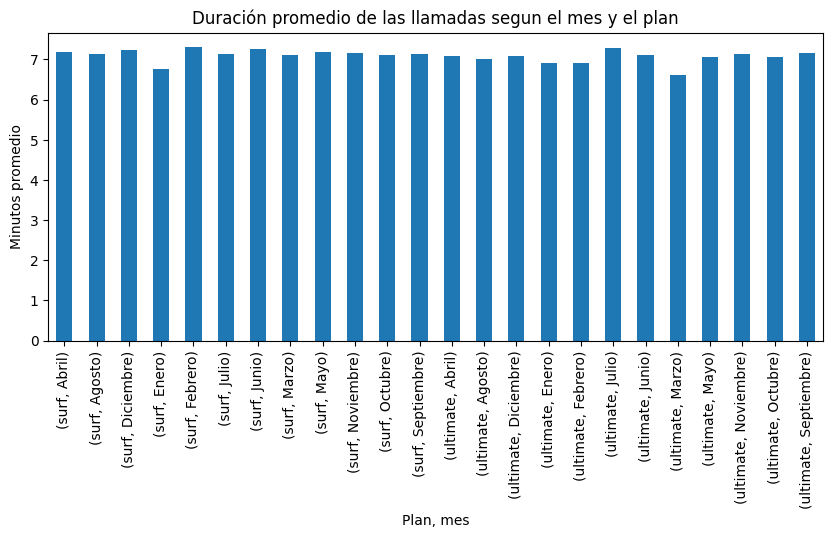

In [57]:
llamadas_agrupadas.plot(kind = "bar",
                       title = "Duración promedio de las llamadas segun el mes y el plan",
                       xlabel = "Plan, mes",
                       ylabel = "Minutos promedio",
                       figsize = [10,4],
                       legend = False)
plt.show()

Se observa que la duración promedio de la llamada no varia mucho dependiendo del plan tarifario y el mes. 

In [58]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutos_promedio_usuarios_surf = informacion_por_usuario[informacion_por_usuario["plan"]=="surf"][["minutos"]]
minutos_promedio_usuarios_surf

,minutos
1,182.0
2,412.0
3,426.0
4,393.0
5,315.0
...,...
2288,363.0
2289,496.0
2290,308.0
2291,385.0


In [59]:
minutos_promedio_usuarios_ultimate = informacion_por_usuario[informacion_por_usuario["plan"]=="ultimate"][["minutos"]]
minutos_promedio_usuarios_ultimate

,minutos
0,124.0
19,59.0
20,10.0
26,634.0
27,446.0
...,...
2258,473.0
2259,500.0
2260,450.0
2261,529.0


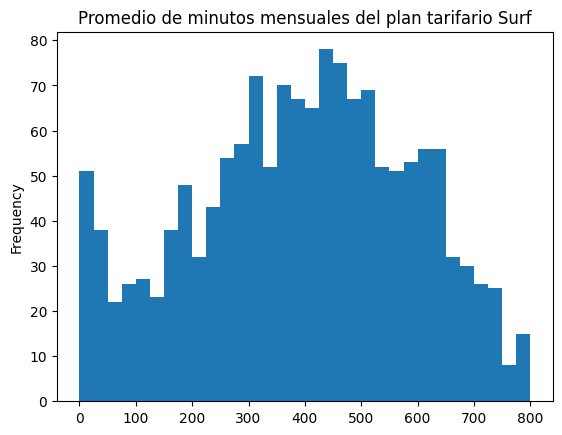

In [60]:
minutos_promedio_usuarios_surf.plot(kind = "hist",
                                    title = "Promedio de minutos mensuales del plan tarifario Surf",
                                    bins = [0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500,525,550,575,600,625,650,675,700,725,750,775,800],
                                    legend = False)
plt.show()

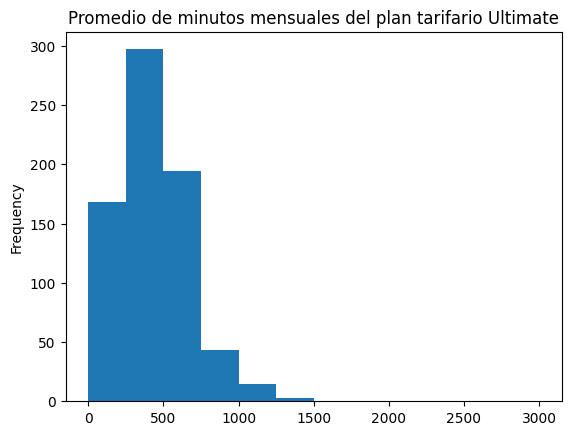

In [61]:
minutos_promedio_usuarios_ultimate.plot(kind = "hist",
                                    title = "Promedio de minutos mensuales del plan tarifario Ultimate",
                                    bins = [0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000],
                                    legend = False)
plt.show()

Con respecto a la cantidad de minutos consumidos según el plan tarifario, se observa que es normal que los usuarios del plan Surf se excedan de los minutos que se les permite consumir. Los usuarios del plan Ultimate no suelen consumir ni siquiera la mitad de los minutos que el plan les otorga. Por lo tanto, Megaline solo recibirá ingresos extra de los usuarios del plan Surf con respecto la categoría llamadas.

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

Los estadísticos más importantes son los siguientes:

In [62]:
# Calcula la media y la varianza de la duración mensual de llamadas.
media_llamada_surf = minutos_promedio_usuarios_surf["minutos"].mean()
media_llamada_ultimate = minutos_promedio_usuarios_ultimate["minutos"].mean()
varianza_llamada_surf = np.var(minutos_promedio_usuarios_surf["minutos"])
varianza_llamada_ultimate = np.var(minutos_promedio_usuarios_ultimate["minutos"])
desvest_llamada_surf = np.std(minutos_promedio_usuarios_surf["minutos"])
desvest_llamada_ultimate = np.std(minutos_promedio_usuarios_ultimate["minutos"])

print("La media de minutos de las llamadas del plan tarifario Surf es de " + str(media_llamada_surf) + " minutos.")
print("La media de minutos de las llamadas del plan tarifario Ultimate es de " + str(media_llamada_ultimate) + " minutos.")
print("La varianza de minutos de las llamadas del plan tarifario Surf es de " + str(varianza_llamada_surf) + " minutos.")
print("La varianza de minutos de las llamadas del plan tarifario Ultimate es de " + str(varianza_llamada_ultimate) + " minutos.")
print("La desviación estandar de minutos de las llamadas del plan tarifario Surf es de " + str(desvest_llamada_surf) + " minutos.")
print("La desviación estandar de minutos de las llamadas del plan tarifario Ultimate es de " + str(desvest_llamada_ultimate) + " minutos.")

La media de minutos de las llamadas del plan tarifario Surf es de 428.7495232040687 minutos.
La media de minutos de las llamadas del plan tarifario Ultimate es de 430.45 minutos.
La varianza de minutos de las llamadas del plan tarifario Surf es de 54933.334591317485 minutos.
La varianza de minutos de las llamadas del plan tarifario Ultimate es de 57764.12527777777 minutos.
La desviación estandar de minutos de las llamadas del plan tarifario Surf es de 234.37861376695076 minutos.
La desviación estandar de minutos de las llamadas del plan tarifario Ultimate es de 240.34168443650753 minutos.


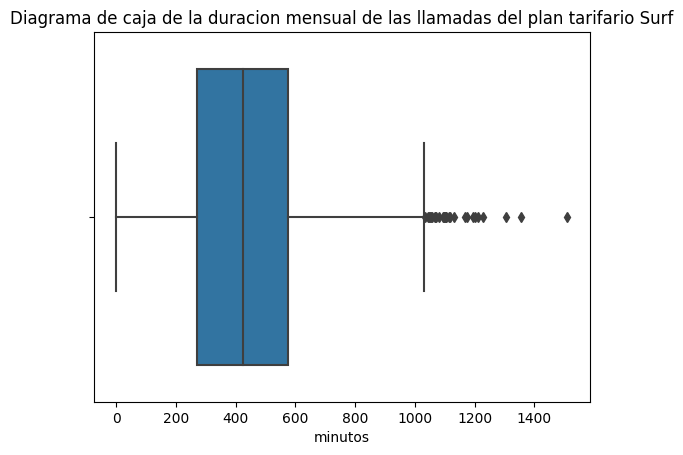

In [63]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(minutos_promedio_usuarios_surf["minutos"]).set_title("Diagrama de caja de la duracion mensual de las llamadas del plan tarifario Surf")
plt.show()

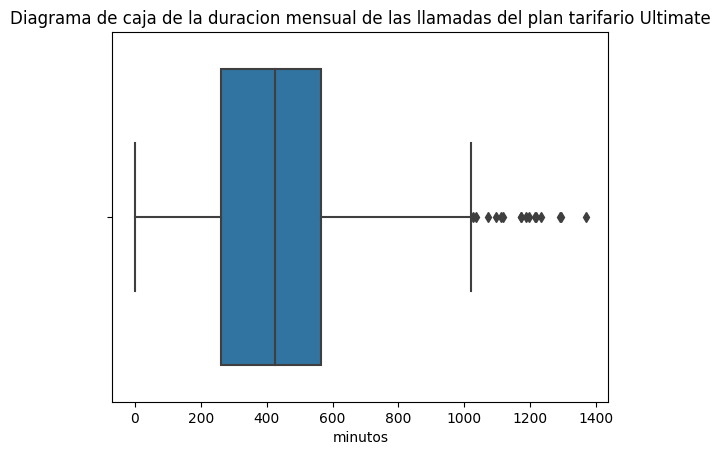

In [64]:
sns.boxplot(minutos_promedio_usuarios_ultimate["minutos"]).set_title("Diagrama de caja de la duracion mensual de las llamadas del plan tarifario Ultimate")
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

El comportamiento entre los usuarios de ambos planes tarifarios varia con respecto a la categoria de llamadas. Los usuarios del plan Surf son más propensos a consumir más minutos de los que se les permiten, por lo que terminarán pagando extra a la compañía. Los usuarios del plan Ultimate no sobrepasan sus minutos otorgados, por lo que la empresa no suele recibir ingresos extras por llamadas de este tipo de usuarios. La media de los minutos consumidos del plan tarifario  

### Mensajes

In [65]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
mensajes_enviados_por_mes = informacion_por_usuario.groupby(["plan","month"])[["mensajes"]].mean()
mensajes_enviados_por_mes

mensajes
plan     month                
surf     Abril       17.400000
         Agosto      28.777778
         Diciembre   38.600629
         Enero       10.500000
         Febrero     12.000000
         Julio       27.033058
         Junio       25.298969
         Marzo       15.260870
         Mayo        24.012987
         Noviembre   32.385159
         Octubre     33.839662
         Septiembre  30.762887
ultimate Abril       22.047619
         Agosto      38.478873
         Diciembre   45.006623
         Enero       15.500000
         Febrero     21.571429
         Julio       32.830508
         Junio       29.340426
         Marzo       20.250000
         Mayo        32.103448
         Noviembre   38.606299
         Octubre     39.443396
         Septiembre  37.895349

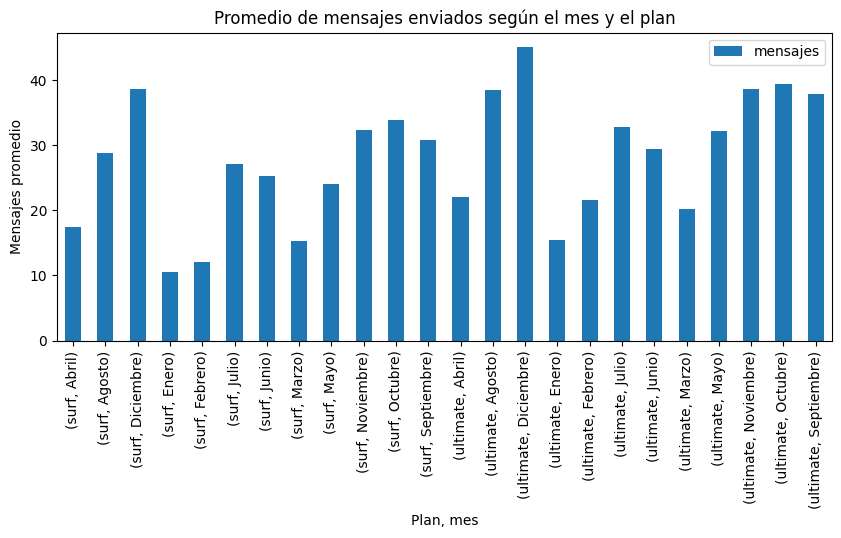

In [66]:
mensajes_enviados_por_mes.plot(kind = "bar",
                               title = "Promedio de mensajes enviados según el mes y el plan",
                               xlabel = "Plan, mes",
                               ylabel = "Mensajes promedio",
                               figsize = [10,4])
plt.show()

Se observa que la cantidad de mensajes con respecto a ambos planes sigue una distribución similar. A medida que avanza el año, incrementa la cantidad promedio de mensajes enviados. Además, se observa que a pesar de seguir la misma distribución, los usuarios del plan tarifario Ultimate envían mas mensajes que el plan tarifario Surf.

In [67]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
mensajes_promedio_usuarios_surf = informacion_por_usuario[informacion_por_usuario["plan"]=="surf"][["mensajes"]]
mensajes_promedio_usuarios_surf

,mensajes
1,30.0
2,44.0
3,36.0
4,53.0
5,44.0
...,...
2288,0.0
2289,0.0
2290,0.0
2291,0.0


In [68]:
mensajes_promedio_usuarios_ultimate = informacion_por_usuario[informacion_por_usuario["plan"]=="ultimate"][["mensajes"]]
mensajes_promedio_usuarios_ultimate

,mensajes
0,11.0
19,139.0
20,15.0
26,26.0
27,37.0
...,...
2258,0.0
2259,0.0
2260,0.0
2261,0.0


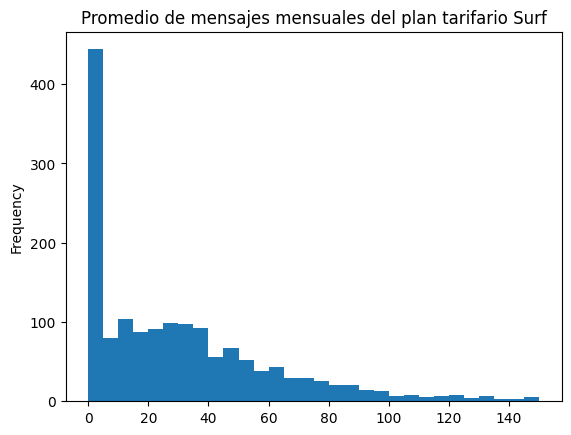

In [70]:
mensajes_promedio_usuarios_surf.plot(kind = "hist",
                                    title = "Promedio de mensajes mensuales del plan tarifario Surf",
                                    bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150],
                                    legend = False)
plt.show()

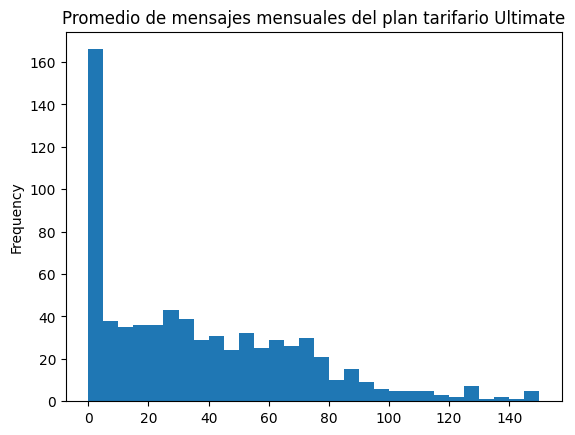

In [71]:
mensajes_promedio_usuarios_ultimate.plot(kind = "hist",
                                    title = "Promedio de mensajes mensuales del plan tarifario Ultimate",
                                    bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150],
                                    legend = False)
plt.show()

Con respecto al promedio de mensajes mensuales que los usuarios de ambos planes suelen enviar, podemo observar que los usuarios de los dos planes tarifarios tienden a un comportamiento similar: la gran mayoria suele enviar no más de 5 mensajes. Varios suuarios del plan tarifario Surf suelen enviar entre 6 y 40 mensajes, y a medida que la cantidad de mensajes aumenra, disminuye la cantidad de usuarios. Además, una cantidad significativa de los usuarios del plan Ultimate oscila entre los 6 y los 80 mensajes, pero a medida que la cantidad de mensaje aumenta, disminuye la cantidad de usuarios.  

Los estadísticos más importantes son los siguientes:

In [72]:
media_mensajes_surf = mensajes_promedio_usuarios_surf["mensajes"].mean()
media_mensajes_ultimate = mensajes_promedio_usuarios_ultimate["mensajes"].mean()
varianza_mensajes_surf = np.var(mensajes_promedio_usuarios_surf["mensajes"])
varianza_mensajes_ultimate = np.var(mensajes_promedio_usuarios_ultimate["mensajes"])
desvest_mensajes_surf = np.std(mensajes_promedio_usuarios_surf["mensajes"])
desvest_mensajes_ultimate = np.std(mensajes_promedio_usuarios_ultimate["mensajes"])

print("La media de mensajes del plan tarifario Surf es de " + str(media_mensajes_surf) + " mensajes.")
print("La media de mensajes del plan tarifario Ultimate es de " + str(media_mensajes_ultimate) + " mensajes.")
print("La varianza de mensajes del plan tarifario Surf es de " + str(varianza_mensajes_surf) + " mensajes.")
print("La varianza de mensajes del plan tarifario Ultimate es de " + str(varianza_mensajes_ultimate) + " mensajes.")
print("La desviación estandar de mensajes del plan tarifario Surf es de " + str(desvest_mensajes_surf) + " mensajes.")
print("La desviación estandar de mensajes del plan tarifario Ultimate es de " + str(desvest_mensajes_ultimate) + " mensajes.")

La media de mensajes del plan tarifario Surf es de 31.15956770502225 mensajes.
La media de mensajes del plan tarifario Ultimate es de 37.55138888888889 mensajes.
La varianza de mensajes del plan tarifario Surf es de 1126.008231726662 mensajes.
La varianza de mensajes del plan tarifario Ultimate es de 1207.0779147376545 mensajes.
La desviación estandar de mensajes del plan tarifario Surf es de 33.556046127734746 mensajes.
La desviación estandar de mensajes del plan tarifario Ultimate es de 34.743026850544474 mensajes.


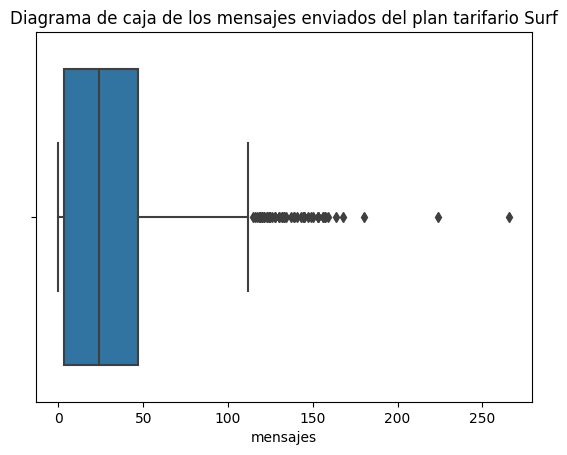

In [73]:
sns.boxplot(mensajes_promedio_usuarios_surf["mensajes"]).set_title("Diagrama de caja de los mensajes enviados del plan tarifario Surf")
plt.show()

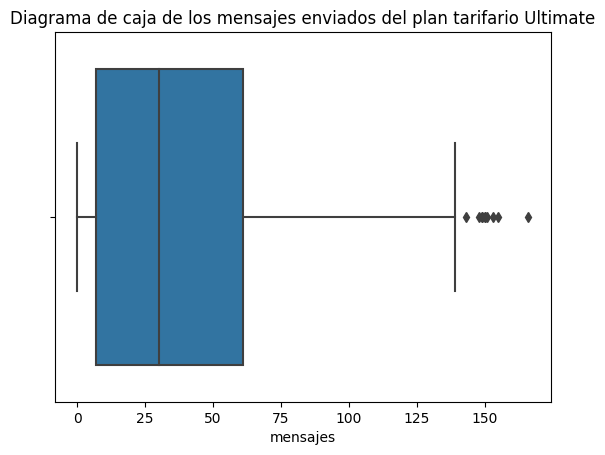

In [74]:
sns.boxplot(mensajes_promedio_usuarios_ultimate["mensajes"]).set_title("Diagrama de caja de los mensajes enviados del plan tarifario Ultimate")
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

El comportamiento ede mensajes enviados entre los usuarios de los planes tarifarios Surf y Ultimate es similar. Ambas medias de mensajes son muy similares, asi como sus desviaciones estandar. Sin embargo, en el caso del plan tarifario Surf, el 25% de los usuarios suelen sobrepasar los mensajes permitidos por el plan, mientras que en el caso del plan Ultimate no hay presencia de usuarios que hayan sobrepasado el límite. Por lo tanto, la empresa obtiene beneficios de mensajes extras solo en el caso de los usuarios del plan tarifario Surf.

### Internet

In [75]:
gb_consumidos_por_plan = informacion_por_usuario.groupby(["plan","month"])[["internet_gb"]].mean()
gb_consumidos_por_plan

internet_gb
plan     month                  
surf     Abril         28.880000
         Agosto        40.277778
         Diciembre     43.949686
         Enero         14.000000
         Febrero       30.000000
         Julio         40.264463
         Junio         37.515464
         Marzo         31.260870
         Mayo          33.844156
         Noviembre     39.957597
         Octubre       41.987342
         Septiembre    40.221649
ultimate Abril         38.428571
         Agosto        42.619718
         Diciembre     44.377483
         Enero         15.250000
         Febrero       39.714286
         Julio         39.644068
         Junio         35.851064
         Marzo         40.250000
         Mayo          39.310345
         Noviembre     40.732283
         Octubre       41.556604
         Septiembre    40.465116

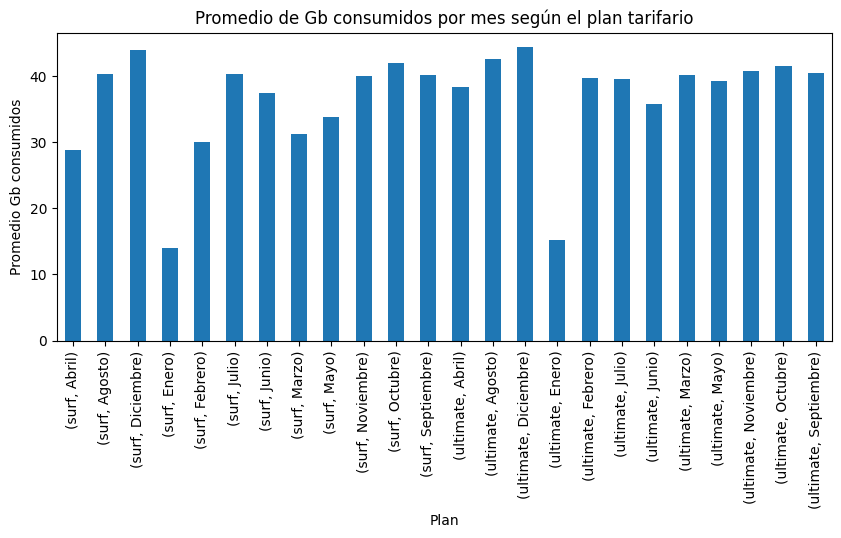

In [76]:
gb_consumidos_por_plan.plot(kind = "bar",
                          y = "internet_gb",
                          title = "Promedio de Gb consumidos por mes según el plan tarifario",
                          figsize = [10,4],
                          legend = False,
                          xlabel = "Plan",
                          ylabel = "Promedio Gb consumidos")
plt.show()

El promedio de gigabytes consumidos por mes del año para ambos planes tarifarios sigue una distribución muy similar, sin embargo hay dos diferencias. Por un lado, los usuarios del plan tarifario Ultimate consumen mayor cantidad de internet que los de Surf, y por otro lado, a medida que aumenta el mes, tambien aumenta la cantidad de internet consumido.

In [77]:
gb_promedio_usuarios_surf = informacion_por_usuario[informacion_por_usuario["plan"]=="surf"][["internet_gb"]]
gb_promedio_usuarios_surf

,internet_gb
1,21.0
2,55.0
3,49.0
4,50.0
5,41.0
...,...
2288,52.0
2289,58.0
2290,43.0
2291,52.0


In [78]:
gb_promedio_usuarios_ultimate = informacion_por_usuario[informacion_por_usuario["plan"]=="ultimate"][["internet_gb"]]
gb_promedio_usuarios_ultimate

,internet_gb
0,4.0
19,62.0
20,7.0
26,40.0
27,56.0
...,...
2258,36.0
2259,41.0
2260,44.0
2261,40.0


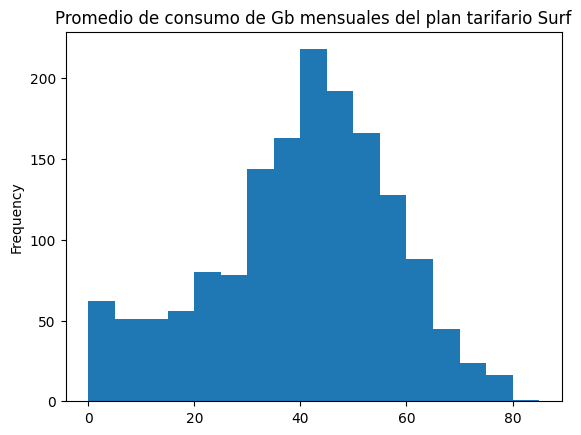

In [79]:
gb_promedio_usuarios_surf.plot(kind = "hist",
                                    title = "Promedio de consumo de Gb mensuales del plan tarifario Surf",
                                    bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85],
                                    legend = False)
plt.show()

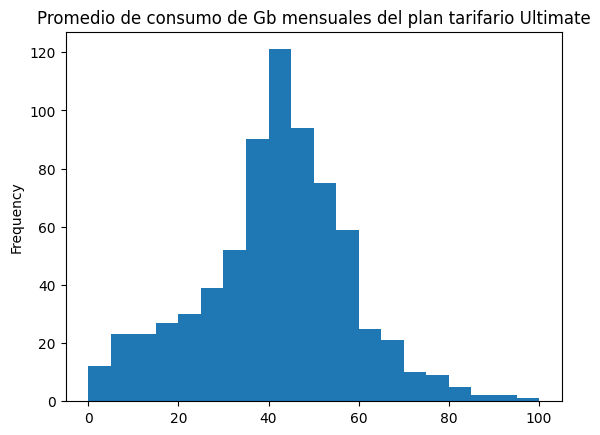

In [80]:
gb_promedio_usuarios_ultimate.plot(kind = "hist",
                                    title = "Promedio de consumo de Gb mensuales del plan tarifario Ultimate",
                                    bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
                                    legend = False)
plt.show()

El consumo promedio de gigabytes mensuales por cliente es muy similar para ambos panes tarifarios. Ambos planes siguen una disribución similar a la normal. 

Los estadísticos más importantes son los siguientes:

In [81]:
media_gb_surf = gb_promedio_usuarios_surf["internet_gb"].mean()
media_gb_ultimate = gb_promedio_usuarios_ultimate["internet_gb"].mean()
varianza_gb_surf = np.var(gb_promedio_usuarios_surf["internet_gb"])
varianza_gb_ultimate = np.var(gb_promedio_usuarios_ultimate["internet_gb"])
desvest_gb_surf = np.std(gb_promedio_usuarios_surf["internet_gb"])
desvest_gb_ultimate = np.std(gb_promedio_usuarios_ultimate["internet_gb"])

print("La media de Gb consumidos del plan tarifario Surf es de " + str(media_gb_surf) + " Gb.")
print("La media de Gb consumidos del plan tarifario Ultimate es de " + str(media_gb_ultimate) + " Gb.")
print("La varianza de Gb consumidos del plan tarifario Surf es de " + str(varianza_gb_surf) + " Gb.")
print("La varianza de Gb consumidos del plan tarifario Ultimate es de " + str(varianza_gb_ultimate) + " Gb.")
print("La desviación estandar de Gb consumidos del plan tarifario Surf es de " + str(desvest_gb_surf) + " Gb.")
print("La desviación estandar de Gb consumidos del plan tarifario Ultimate es de " + str(desvest_gb_ultimate) + " Gb.")

La media de Gb consumidos del plan tarifario Surf es de 40.14049586776859 Gb.
La media de Gb consumidos del plan tarifario Ultimate es de 41.080555555555556 Gb.
La varianza de Gb consumidos del plan tarifario Surf es de 318.1296569696269 Gb.
La varianza de Gb consumidos del plan tarifario Ultimate es de 272.8185108024691 Gb.
La desviación estandar de Gb consumidos del plan tarifario Surf es de 17.836189530547912 Gb.
La desviación estandar de Gb consumidos del plan tarifario Ultimate es de 16.517218615810265 Gb.


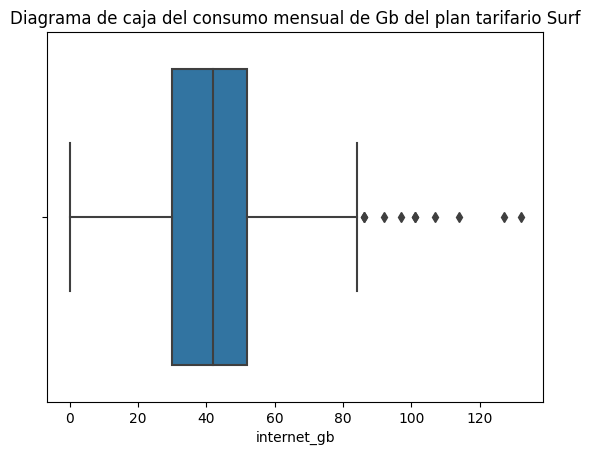

In [82]:
sns.boxplot(gb_promedio_usuarios_surf["internet_gb"]).set_title("Diagrama de caja del consumo mensual de Gb del plan tarifario Surf")
plt.show()

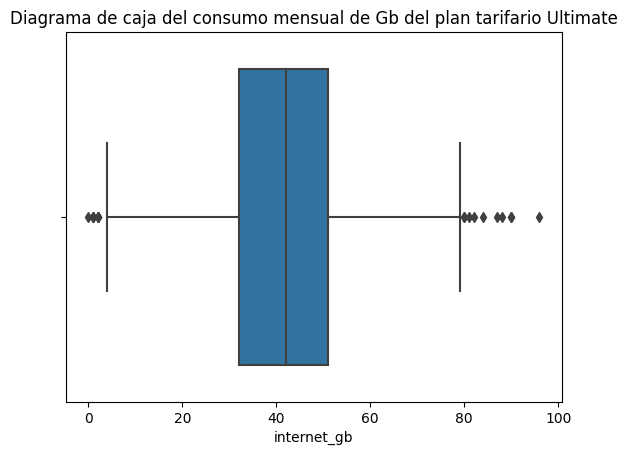

In [83]:
sns.boxplot(gb_promedio_usuarios_ultimate["internet_gb"]).set_title("Diagrama de caja del consumo mensual de Gb del plan tarifario Ultimate")
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Podemos concluir que el comportamiento de los clientes de ambos planes tarifarios con respecto al consumo de internet es miy similar. Resulta interesante observar que tanto el 75% de los usuarios del plan tarifario Surf como del plan tarifario Ultimate suelen sobrepasar el límite establecipo por el plan. Este hallazgo resulata vital para la compañía, ya que prácticamente recibe ingresos extra de 3 de cada 4 clientes de ambos planes tarifarios por concepto de internet extra consumido.  

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [84]:
ingresos_por_plan = informacion_por_usuario.groupby(["plan","month"])[["ingreso_llamadas_extra","ingreso_mensajes_extra","ingreso_internet_gb_extra","ingreso_total"]].mean()
ingresos_por_plan

ingreso_llamadas_extra  ingreso_mensajes_extra  \
plan     month                                                        
surf     Abril                     1.058400                0.052200   
         Agosto                    1.652222                0.180185   
         Diciembre                 2.533585                0.319057   
         Enero                     0.000000                0.000000   
         Febrero                   1.036667                0.026667   
         Julio                     2.198182                0.145289   
         Junio                     1.601134                0.149381   
         Marzo                     0.706957                0.016957   
         Mayo                      1.658571                0.125455   
         Noviembre                 1.751131                0.210742   
         Octubre                   1.794304                0.251392   
         Septiembre                1.435979                0.186031   
ultimate Abril                     0.707143                0.080000   
         Agosto                    1.711690                0.293239   
         Diciembre                 2.362848                0.423179   
         Enero                     0.000000                0.000000   
         Febrero                   1.782857                0.072857   
         Julio                     2.209322                0.185593   
         Junio                     0.998298                0.152553   
         Marzo                     1.130000                0.095000   
         Mayo                      1.476207                0.255517   
         Noviembre                 2.135197                0.299291   
         Octubre                   1.985943                0.296887   
         Septiembre                1.901860                0.247674   

                     ingreso_internet_gb_extra  ingreso_total  
plan     month                                                 
surf     Abril                       67.140000      88.250600  
         Agosto                     110.882716     132.715123  
         Diciembre                  124.323899     147.176541  
         Enero                       30.000000      50.000000  
         Febrero                     62.000000      83.063333  
         Julio                      101.289256     123.632727  
         Junio                       85.783505     107.534021  
         Marzo                       74.956522      95.680435  
         Mayo                        77.363636      99.147662  
         Noviembre                  102.572438     124.534311  
         Octubre                    113.772152     135.817848  
         Septiembre                 103.278351     124.900361  
ultimate Abril                       93.714286     164.501429  
         Agosto                     113.478873     185.483803  
         Diciembre                  122.543046     195.329073  
         Enero                       32.500000     102.500000  
         Febrero                    105.428571     177.284286  
         Julio                       96.135593     168.530508  
         Junio                       80.829787     151.980638  
         Marzo                      124.833333     196.058333  
         Mayo                       101.137931     172.869655  
         Noviembre                  106.314961     178.749449  
         Octubre                    108.858491     181.141321  
         Septiembre                 102.011628     174.161163

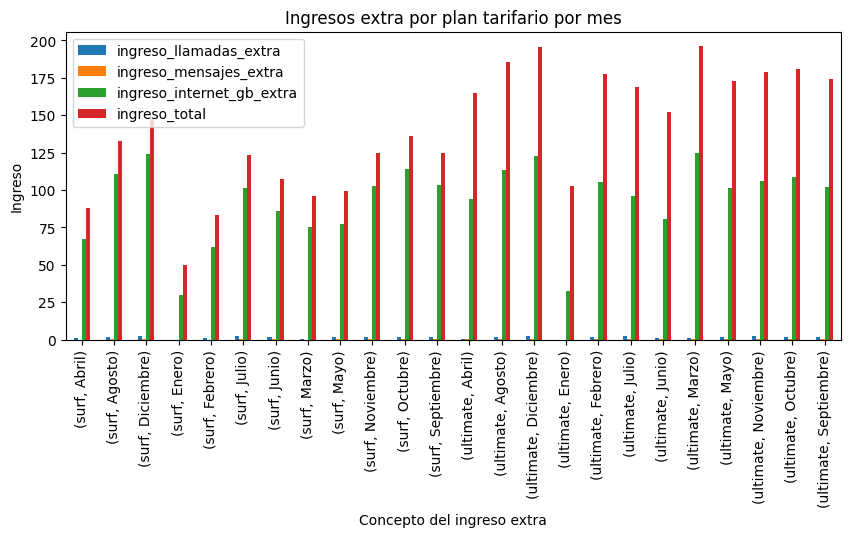

In [85]:
ingresos_por_plan.plot(kind = "bar",
                      title = "Ingresos extra por plan tarifario por mes",
                      xlabel = "Concepto del ingreso extra",
                      ylabel = "Ingreso",
                      figsize = [10,4])
plt.show()

La gráfica es muy ilustartiva, ya que nos permite observar la cantidad de ingreso promedio percibido por mes segun el plan tarifario desglozado en las tres categorias del plan. Como era de esperarse, la categoría que brinda más ingresos extra son los gigabytes de internet extra consumidos. Los ingresos extra por llamadas y ensajes extra son mínimos. El resto de los ingresos corresponde al precio del plan tarifario establecido en el contrato.

In [86]:
ingreso_promedio_usuarios_surf = informacion_por_usuario[informacion_por_usuario["plan"]=="surf"][["ingreso_llamadas_extra","ingreso_mensajes_extra","ingreso_internet_gb_extra","ingreso_total"]]
ingreso_promedio_usuarios_surf

,ingreso_llamadas_extra,ingreso_mensajes_extra,ingreso_internet_gb_extra,ingreso_total
1,0.0,0.00,60.0,80.00
2,0.0,0.00,175.0,195.00
3,0.0,0.00,133.0,153.00
4,0.0,0.09,140.0,160.09
5,0.0,0.00,77.0,97.00
...,...,...,...,...
2288,0.0,0.00,154.0,174.00
2289,0.0,0.00,196.0,216.00
2290,0.0,0.00,91.0,111.00
2291,0.0,0.00,154.0,174.00


In [87]:
ingreso_promedio_usuarios_ultimate = informacion_por_usuario[informacion_por_usuario["plan"]=="ultimate"][["ingreso_llamadas_extra","ingreso_mensajes_extra","ingreso_internet_gb_extra","ingreso_total"]]
ingreso_promedio_usuarios_ultimate

,ingreso_llamadas_extra,ingreso_mensajes_extra,ingreso_internet_gb_extra,ingreso_total
0,0.00,0.00,0.0,70.00
19,0.00,2.67,224.0,296.67
20,0.00,0.00,0.0,70.00
26,4.02,0.00,70.0,144.02
27,0.00,0.00,182.0,252.00
...,...,...,...,...
2258,0.00,0.00,42.0,112.00
2259,0.00,0.00,77.0,147.00
2260,0.00,0.00,98.0,168.00
2261,0.87,0.00,70.0,140.87


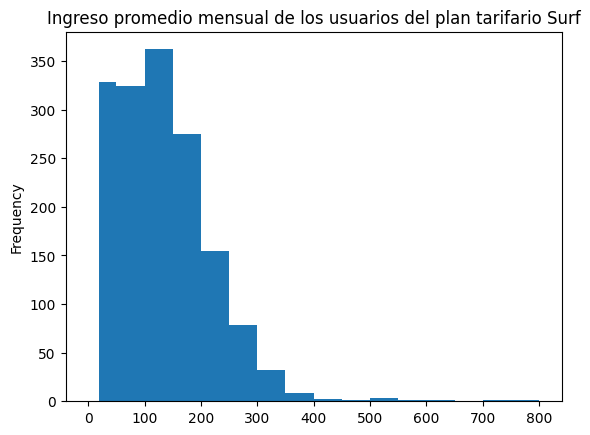

In [88]:
ingreso_promedio_usuarios_surf.plot(kind = "hist",
                                  title = "Ingreso promedio mensual de los usuarios del plan tarifario Surf",
                                  bins = [0,20,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800],
                                  y = "ingreso_total",
                                  legend = False)
plt.show()

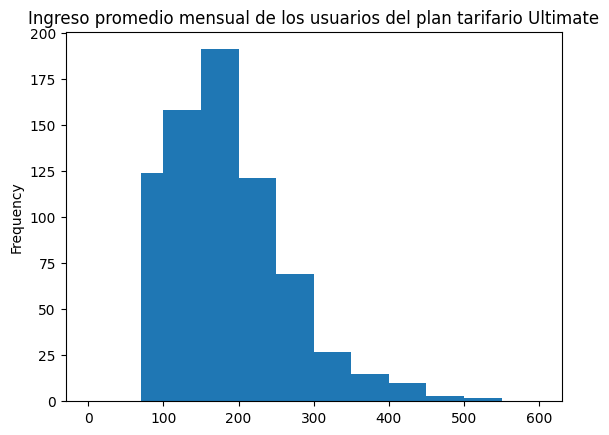

In [89]:
ingreso_promedio_usuarios_ultimate.plot(kind = "hist",
                                  title = "Ingreso promedio mensual de los usuarios del plan tarifario Ultimate",
                                  bins = [0,70,100,150,200,250,300,350,400,450,500,550,600],
                                  y = "ingreso_total",
                                  legend = False)
plt.show()

Se peude observar que una parte significativa de los usuarios de ambos planes suelen pagar simplemente el precio del plan tarifario estandar. Sin embargo, resulta interesante observar que la gran mayoría de los clientes pagan extra por sobrepasar los límites establecidos en sus contratos. Además, tambien se observa que los clientes que pagan ás por motivo de incumplimiento de los limites del contrato son del plan tarifario Surf.

Los estadísticos más importantes son los siguientes:

In [90]:
media_ingreso_surf = ingreso_promedio_usuarios_surf["ingreso_total"].mean()
media_ingreso_ultimate = ingreso_promedio_usuarios_ultimate["ingreso_total"].mean()
varianza_ingreso_surf = np.var(ingreso_promedio_usuarios_surf["ingreso_total"])
varianza_ingreso_ultimate = np.var(ingreso_promedio_usuarios_ultimate["ingreso_total"])
desvest_ingreso_surf = np.std(ingreso_promedio_usuarios_surf["ingreso_total"])
desvest_ingreso_ultimate = np.std(ingreso_promedio_usuarios_ultimate["ingreso_total"])

print("La media del ingreso percibido del plan tarifario Surf es de " + str(media_ingreso_surf) + " dólares.")
print("La media del ingreso percibido del plan tarifario Ultimate es de " + str(media_ingreso_ultimate) + " dólares.")
print("La varianza del ingreso percibido del plan tarifario Surf es de " + str(varianza_ingreso_surf) + " dólares.")
print("La varianza del ingreso percibido del plan tarifario Ultimate es de " + str(varianza_ingreso_ultimate) + " dólares.")
print("La desviación estandar del ingreso percibido del plan tarifario Surf es de " + str(desvest_ingreso_surf) + " dólares.")
print("La desviación estandar del ingreso percibido del plan tarifario Ultimate es de " + str(desvest_ingreso_ultimate) + " dólares.")

La media del ingreso percibido del plan tarifario Surf es de 127.43177368086458 dólares.
La media del ingreso percibido del plan tarifario Ultimate es de 179.30818055555554 dólares.
La varianza del ingreso percibido del plan tarifario Surf es de 7287.384357248207 dólares.
La varianza del ingreso percibido del plan tarifario Ultimate es de 6668.835222106289 dólares.
La desviación estandar del ingreso percibido del plan tarifario Surf es de 85.36617806396282 dólares.
La desviación estandar del ingreso percibido del plan tarifario Ultimate es de 81.66293664880224 dólares.


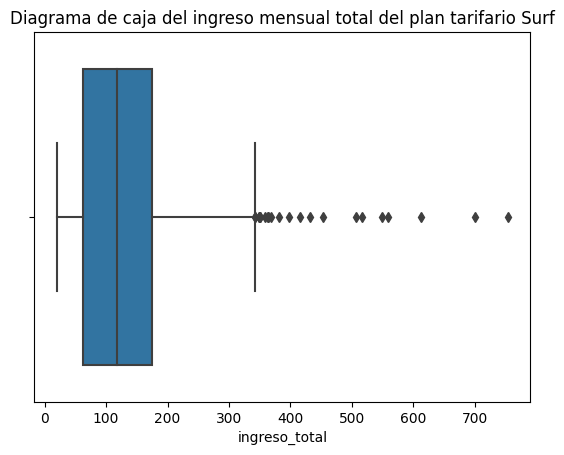

In [91]:
sns.boxplot(ingreso_promedio_usuarios_surf["ingreso_total"]).set_title("Diagrama de caja del ingreso mensual total del plan tarifario Surf")
plt.show()

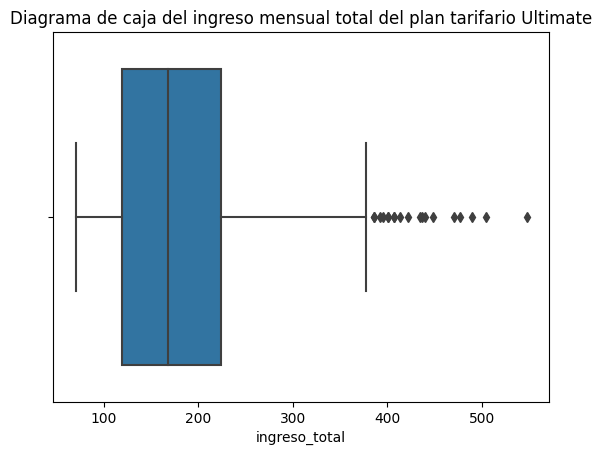

In [92]:
sns.boxplot(ingreso_promedio_usuarios_ultimate["ingreso_total"]).set_title("Diagrama de caja del ingreso mensual total del plan tarifario Ultimate")
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Los usuarios del plan tarifario Surf pagan en promedio 127 dólares mensuales. Prácticamente casi todos los clientes de este plan suelen pagar más de lo establecido en el plan. Esto significa que un cliente con este plan tarifario garantiza ingresos extras a la compañía. 

Los usuarios del plan tarifario Ultimate pagan en promedio 179 dólares mensuales. Al igual que el otro plan tarifario, la gran mayoria suelen pagar más de lo establecido en el plan, aunque el cliente inscritoen este plan es más propenso a no sobrepasar los límites tarifarios. Sin embargo, tambien un usuario de este plan tarifario es garantía de ingresos extras para la empresa.

Si la empresa tuviera que escoger en promocionar un plan, este deberia ser el Surf. Se puede observar que los diagramas de caja que un cliente de este plan puede llegar a pagar hasta 800 dolares (son observaciones atípicas pero suelen suceder), mientras que un cliente del plan tarifario Ultimate lo máximo que llega a pagar es 550 dólares (igualmente es una observación atípica).

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

### Prueba de hipótesis sobre los ingresos promedio de ambos planes tarifarios

Para realizar esta prueba, se establecerá la hipótesis de que los ingresos promedio mensuales de los planes Surf y Ultimate son iguales. Para establecer que la prueba sea confiable, se decidió un nivel de siginifacia del 95%. 

In [93]:
# Prueba las hipótesis
print("H0: Los ingresos promedio de ambos planes (Surf y Ultimate) son iguales")
print("H0: media_ingreso_surf = media_ingreso_ultimate")
print()
print("H1: Los ingresos promedio de ambos planes (Surf y Ultimate) son diferentes")
print("H1: media_ingreso_surf ≠ media_ingreso_ultimate")
print()
alpha = 0.05
prueba_hipotesis_igualdad_ingresos_promedio = st.stats.ttest_ind(ingreso_promedio_usuarios_surf["ingreso_total"],ingreso_promedio_usuarios_ultimate["ingreso_total"],equal_var = False)
print("P-value: " + str(prueba_hipotesis_igualdad_ingresos_promedio.pvalue))
print()
if prueba_hipotesis_igualdad_ingresos_promedio.pvalue < alpha:
    print("Se rechaza la hipótesis nula sobre la igualdad en los ingresos promedio de ambos planes tarifarios")
else:
    print("No se rechaza la hipótesis nula sobre la igualdad en los ingresos promedio de ambos planes tarifarios")

H0: Los ingresos promedio de ambos planes (Surf y Ultimate) son iguales
H0: media_ingreso_surf = media_ingreso_ultimate

H1: Los ingresos promedio de ambos planes (Surf y Ultimate) son diferentes
H1: media_ingreso_surf ≠ media_ingreso_ultimate

P-value: 2.2288516882968178e-41

Se rechaza la hipótesis nula sobre la igualdad en los ingresos promedio de ambos planes tarifarios


/tmp/ipykernel_100/2717999662.py:9: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  prueba_hipotesis_igualdad_ingresos_promedio = st.stats.ttest_ind(ingreso_promedio_usuarios_surf["ingreso_total"],ingreso_promedio_usuarios_ultimate["ingreso_total"],equal_var = False)


### Prueba de hipótesis sobre los ingresos del área NY-NJ

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Para realizar esta prueba, se establecerá la hipótesis de que los ingresos promedio mensuales de los usuarios de las ciudades de Nueva York y Nueva Jersey no varian con respecto a las demás ciudades de Estados Unidos. Para establecer que la prueba sea confiable, se decidió un nivel de siginifacia del 95%.

#### Obtención de las muestras

In [94]:
usuarios_ny_nj = users[users["city"]=="New York-Newark-Jersey City, NY-NJ-PA MSA"][["user_id","city"]]
usuarios_ny_nj

,user_id,city
14,1014,"New York-Newark-Jersey City, NY-NJ-PA MSA"
22,1022,"New York-Newark-Jersey City, NY-NJ-PA MSA"
24,1024,"New York-Newark-Jersey City, NY-NJ-PA MSA"
27,1027,"New York-Newark-Jersey City, NY-NJ-PA MSA"
31,1031,"New York-Newark-Jersey City, NY-NJ-PA MSA"
...,...,...
469,1469,"New York-Newark-Jersey City, NY-NJ-PA MSA"
482,1482,"New York-Newark-Jersey City, NY-NJ-PA MSA"
494,1494,"New York-Newark-Jersey City, NY-NJ-PA MSA"
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [95]:
usuarios_no_ny_nj = users[users["city"]!="New York-Newark-Jersey City, NY-NJ-PA MSA"][["user_id","city"]]
usuarios_no_ny_nj

,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...
492,1492,"Portland-Vancouver-Hillsboro, OR-WA MSA"
493,1493,"Boston-Cambridge-Newton, MA-NH MSA"
496,1496,"New Orleans-Metairie, LA MSA"
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA"


In [96]:
ingreso_usuarios_ny_nj = informacion_por_usuario[informacion_por_usuario["user_id"].isin(usuarios_ny_nj["user_id"])][["ingreso_total"]]
ingreso_usuarios_ny_nj

,ingreso_total
56,58.84
57,20.00
75,254.93
76,232.55
77,41.00
...,...
2284,146.00
2285,216.00
2286,139.00
2287,181.00


In [97]:
# Prueba las hipótesis
ingreso_usuarios_no_ny_nj = informacion_por_usuario[informacion_por_usuario["user_id"].isin(usuarios_no_ny_nj["user_id"])][["ingreso_total"]]
ingreso_usuarios_no_ny_nj

,ingreso_total
0,70.00
1,80.00
2,195.00
3,153.00
4,160.09
...,...
2277,200.00
2289,216.00
2290,111.00
2291,174.00


In [98]:
media_ingreso_ny_nj = ingreso_usuarios_ny_nj["ingreso_total"].mean()
media_ingreso_no_ny_nj = ingreso_usuarios_no_ny_nj["ingreso_total"].mean()
varianza_ingreso_ny_nj = np.var(ingreso_usuarios_ny_nj["ingreso_total"])
varianza_ingreso_no_ny_nj = np.var(ingreso_usuarios_no_ny_nj["ingreso_total"])
desvest_ingreso_ny_nj = np.std(ingreso_usuarios_ny_nj["ingreso_total"])
desvest_ingreso_no_ny_nj = np.std(ingreso_usuarios_no_ny_nj["ingreso_total"])

print("La media del ingreso percibido de los usuarios de Nueva York-Nueva Yersey es de " + str(media_ingreso_ny_nj) + " dólares.")
print("La media del ingreso percibido de los usuarios que no son de Nueva York-Nueva Yersey es de " + str(media_ingreso_no_ny_nj) + " dólares.")
print("La varianza del ingreso percibido de los usuarios de Nueva York-Nueva Yersey es de " + str(varianza_ingreso_ny_nj) + " dólares.")
print("La varianza del ingreso percibido de los usuarios que no son de de Nueva York-Nueva Yersey es de " + str(varianza_ingreso_no_ny_nj) + " dólares.")
print("La desviación estandar del ingreso percibido de los usuarios de Nueva York-Nueva Yersey es de " + str(desvest_ingreso_ny_nj) + " dólares.")
print("La desviación estandar del ingreso percibido de los usuarios que no son de de Nueva York-Nueva Yersey es de " + str(desvest_ingreso_no_ny_nj) + " dólares.")

La media del ingreso percibido de los usuarios de Nueva York-Nueva Yersey es de 135.32498673740054 dólares.
La media del ingreso percibido de los usuarios que no son de Nueva York-Nueva Yersey es de 145.3729384133612 dólares.
La varianza del ingreso percibido de los usuarios de Nueva York-Nueva Yersey es de 6600.035466379135 dólares.
La varianza del ingreso percibido de los usuarios que no son de de Nueva York-Nueva Yersey es de 7867.337868870945 dólares.
La desviación estandar del ingreso percibido de los usuarios de Nueva York-Nueva Yersey es de 81.24060232654072 dólares.
La desviación estandar del ingreso percibido de los usuarios que no son de de Nueva York-Nueva Yersey es de 88.69801502215789 dólares.


#### Prueba de hipótesis

In [99]:
print("H0: Los ingresos promedio percibidos de los usuarios de Nueva York-Nueva Jersey son iguales a los del resto de usuarios de Estados Unidos")
print("H0: media_ingreso_ny_nj = media_ingreso_no_ny_nj")
print()
print("H1: Los ingresos promedio percibidos de los usuarios de Nueva York-Nueva Yersey son diferentes a los de resto de usuarios de Estados Unidos")
print("H1: media_ingreso_ny_nj ≠ media_ingreso_no_ny_nj")
print()
alpha = 0.05
prueba_hipotesis_igualdad_ingresos_ny_nj = st.stats.ttest_ind(ingreso_usuarios_ny_nj["ingreso_total"],ingreso_usuarios_no_ny_nj["ingreso_total"],equal_var = False)
print("P-value: " + str(prueba_hipotesis_igualdad_ingresos_ny_nj.pvalue))
print()
if prueba_hipotesis_igualdad_ingresos_ny_nj.pvalue < alpha:
    print("Se rechaza la hipótesis nula sobre la igualdad en los ingresos promedio percibidos entre los usuarios de Nueva York-Nueva Jersey y el resto de usuarios de Estados Unidos")
else:
    print("No se rechaza la hipótesis nula sobre la igualdad en los ingresos promedio percibidos entre los usuarios de Nueva York-Nueva Jersey y el resto de usuarios de Estados Unidos")

H0: Los ingresos promedio percibidos de los usuarios de Nueva York-Nueva Jersey son iguales a los del resto de usuarios de Estados Unidos
H0: media_ingreso_ny_nj = media_ingreso_no_ny_nj

H1: Los ingresos promedio percibidos de los usuarios de Nueva York-Nueva Yersey son diferentes a los de resto de usuarios de Estados Unidos
H1: media_ingreso_ny_nj ≠ media_ingreso_no_ny_nj

P-value: 0.03127703649326644

Se rechaza la hipótesis nula sobre la igualdad en los ingresos promedio percibidos entre los usuarios de Nueva York-Nueva Jersey y el resto de usuarios de Estados Unidos


/tmp/ipykernel_100/2518194125.py:8: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  prueba_hipotesis_igualdad_ingresos_ny_nj = st.stats.ttest_ind(ingreso_usuarios_ny_nj["ingreso_total"],ingreso_usuarios_no_ny_nj["ingreso_total"],equal_var = False)


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Para concluir, se puede observar que la empresa casi siempre recibirá ingresos extras de los usuarios, independientemente del plan al que esten inscritos. Sin embargo, como se pudo observar en las pruebas de hipótesis, si hay variación con respecto a los ingresos percibidos entre ambos planes, y tambien con respecto a los usuarios de diferentes ciudades de Estados Unidos.

Se recomienta a la empresa promocionar más el plan tarifario Surf, ya que a pesar de que el costo del plan es de tan solo 20 dólares, al ser muy poca la cantidad de minutos, mensajes y gigabytes otorgados, los usuarios siempre sobrepasarán estos límites, y al ser las multas más caras con respecto al plan tarifario Ultimate, es más probable que la empresa obtenga mayores ingreoss extras, como se observó en los diagramas de caja de ambos planes tarifarios.

Con respecto a la localización de los usuarios, se recomienda a la empresa realizar una investigación más exhaustiva acerca de las diferentes ciudades y el comportamiento específico en cada una de ellas, para asi poder tomás decisiones más puntuales para cada ciudad.